По датасету из вложения построить наилучший бинарный классификатор, целевой столбец – mark. Оформить в виде jupyter notebook либо .py скрипта (тогда вывод должен быть описан в отдельном файле txt/excel/etc.).

По стеку ограничений нет. Срок 1 день.

In [268]:
import torch
import numpy as np
import pandas as pd
import catboost
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve, recall_score, f1_score, accuracy_score, precision_score
import matplotlib.pyplot as plt
import catboost.datasets as cbd


In [269]:
#dfs = pd.read_excel('result_set.xlsx', sheet_name=None)

In [270]:

file_name = 'result_set.xlsx' 
df = pd.read_excel(file_name)
print(df.head())

       Ft 0      Ft 1      Ft 2      Ft 3       Ft 4      Ft 5       Ft 6  \
0  1.620967  1.056248  0.114203  6.175593   5.625789  0.581535   7.360085   
1  1.274494  0.814288  0.727210  3.606359   1.493780  7.810750  20.314335   
2  0.569931  1.607170  0.479581  3.521474   1.663726  2.297903  12.839282   
3  0.547560  1.724393  0.682358  1.809472  10.149721  2.999319  49.108530   
4  1.798884  1.748245  1.045646  1.560427   1.269053  1.403952   5.270951   

   Ft 7    Ft 8      Ft 9  Ft 10  Ft 11  Ft 12  Ft 13  Ft14        Ft15  \
0    68    male  very_low  535.0   True      5      5     0         NaN   
1    24  female      high  846.0  False      3      1     1  quite rich   
2    67    male      high  782.0  False      0      0     0    moderate   
3    42    male    medium  132.0  False      3      3     0  quite rich   
4    84    male  very_low  708.0  False      0      0     0         NaN   

                  Ft16  Ft17  mark  
0                  car     0     0  
1           

In [271]:
print(df.shape)

(5000, 19)


In [272]:
df = df.fillna('')
df = df.replace('', 'NULL')

print(df.shape)
df.head()


(5000, 19)


,Ft 0,Ft 1,Ft 2,Ft 3,Ft 4,Ft 5,Ft 6,Ft 7,Ft 8,Ft 9,Ft 10,Ft 11,Ft 12,Ft 13,Ft14,Ft15,Ft16,Ft17,mark
0,1.620967,1.056248,0.114203,6.175593,5.625789,0.581535,7.360085,68,male,very_low,535.0,True,5,5,0,NULL,car,0,0
1,1.274494,0.814288,0.727210,3.606359,1.493780,7.810750,20.314335,24,female,high,846.0,False,3,1,1,quite rich,car,1,0
2,0.569931,1.607170,0.479581,3.521474,1.663726,2.297903,12.839282,67,male,high,782.0,False,0,0,0,moderate,furniture/equipment,1,0
3,0.547560,1.724393,0.682358,1.809472,10.149721,2.999319,49.108530,42,male,medium,132.0,False,3,3,0,quite rich,car,0,0
4,1.798884,1.748245,1.045646,1.560427,1.269053,1.403952,5.270951,84,male,very_low,708.0,False,0,0,0,NULL,radio/TV,1,0


In [273]:
X=df.drop('mark', axis=1)
X

,Ft 0,Ft 1,Ft 2,Ft 3,Ft 4,Ft 5,Ft 6,Ft 7,Ft 8,Ft 9,Ft 10,Ft 11,Ft 12,Ft 13,Ft14,Ft15,Ft16,Ft17
0,1.620967,1.056248,0.114203,6.175593,5.625789,0.581535,7.360085,68,male,very_low,535.0,True,5,5,0,NULL,car,0
1,1.274494,0.814288,0.727210,3.606359,1.493780,7.810750,20.314335,24,female,high,846.0,False,3,1,1,quite rich,car,1
2,0.569931,1.607170,0.479581,3.521474,1.663726,2.297903,12.839282,67,male,high,782.0,False,0,0,0,moderate,furniture/equipment,1
3,0.547560,1.724393,0.682358,1.809472,10.149721,2.999319,49.108530,42,male,medium,132.0,False,3,3,0,quite rich,car,0
4,1.798884,1.748245,1.045646,1.560427,1.269053,1.403952,5.270951,84,male,very_low,708.0,False,0,0,0,NULL,radio/TV,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.559134,0.536588,1.279125,0.929000,7.795273,0.516629,3.664827,18,male,high,243.0,False,4,3,0,NULL,car,1
4996,1.857942,0.976926,0.513208,0.707998,0.176079,0.444542,10.778070,78,male,high,643.0,True,2,2,0,moderate,domestic appliances,0
4997,1.207780,0.782006,0.557193,0.186188,1.029377,0.546945,16.717601,70,male,low,690.0,True,5,3,0,little,domestic appliances,0
4998,0.579599,1.191785,0.499301,1.139520,0.080799,0.261127,23.748920,84,female,very_low,498.0,False,5,3,0,little,radio/TV,0


In [274]:
target=df['mark']
target

0       0
1       0
2       0
3       0
4       0
       ..
4995    0
4996    0
4997    0
4998    0
4999    0
Name: mark, Length: 5000, dtype: int64

In [275]:
numeric_indices = np.array([0, 1, 2, 3, 4, 5 ,6, 7, 10, 12, 13, 14, 17])
categorical_indices = np.array([8, 9, 11, 15, 16])

In [276]:
numeric_data = X[X.columns[numeric_indices]]
numeric_data.head()

,Ft 0,Ft 1,Ft 2,Ft 3,Ft 4,Ft 5,Ft 6,Ft 7,Ft 10,Ft 12,Ft 13,Ft14,Ft17
0,1.620967,1.056248,0.114203,6.175593,5.625789,0.581535,7.360085,68,535.0,5,5,0,0
1,1.274494,0.814288,0.727210,3.606359,1.493780,7.810750,20.314335,24,846.0,3,1,1,1
2,0.569931,1.607170,0.479581,3.521474,1.663726,2.297903,12.839282,67,782.0,0,0,0,1
3,0.547560,1.724393,0.682358,1.809472,10.149721,2.999319,49.108530,42,132.0,3,3,0,0
4,1.798884,1.748245,1.045646,1.560427,1.269053,1.403952,5.270951,84,708.0,0,0,0,1


In [277]:
categorial_data = X[X.columns[categorical_indices]]
categorial_data.head()

,Ft 8,Ft 9,Ft 11,Ft15,Ft16
0,male,very_low,True,NULL,car
1,female,high,False,quite rich,car
2,male,high,False,moderate,furniture/equipment
3,male,medium,False,quite rich,car
4,male,very_low,False,NULL,radio/TV


In [278]:
X_train, X_test, y_train, y_test = train_test_split(X.values, target.values,
                                                       train_size=0.8,
                                                       random_state=42)

In [279]:
boosting_model = catboost.CatBoostClassifier(n_estimators=200,
                                             cat_features=categorical_indices)

boosting_model.fit(X_train, y_train)

y_train_predicted = boosting_model.predict_proba(X_train)[:, 1]
y_test_predicted = boosting_model.predict_proba(X_test)[:, 1]


Learning rate set to 0.081465
0:	learn: 0.5269391	total: 35.7ms	remaining: 7.09s
1:	learn: 0.4076696	total: 63.6ms	remaining: 6.29s
2:	learn: 0.3183012	total: 88.2ms	remaining: 5.79s
3:	learn: 0.2518192	total: 118ms	remaining: 5.79s
4:	learn: 0.2058457	total: 130ms	remaining: 5.08s
5:	learn: 0.1719167	total: 142ms	remaining: 4.58s
6:	learn: 0.1461708	total: 174ms	remaining: 4.79s
7:	learn: 0.1271656	total: 186ms	remaining: 4.47s
8:	learn: 0.1121069	total: 215ms	remaining: 4.57s
9:	learn: 0.0974041	total: 245ms	remaining: 4.66s
10:	learn: 0.0888087	total: 262ms	remaining: 4.5s
11:	learn: 0.0815849	total: 291ms	remaining: 4.56s
12:	learn: 0.0736759	total: 320ms	remaining: 4.6s
13:	learn: 0.0683394	total: 347ms	remaining: 4.61s
14:	learn: 0.0633378	total: 379ms	remaining: 4.67s
15:	learn: 0.0601076	total: 407ms	remaining: 4.68s
16:	learn: 0.0564645	total: 435ms	remaining: 4.69s
17:	learn: 0.0540868	total: 464ms	remaining: 4.7s
18:	learn: 0.0516452	total: 493ms	remaining: 4.7s
19:	learn: 0

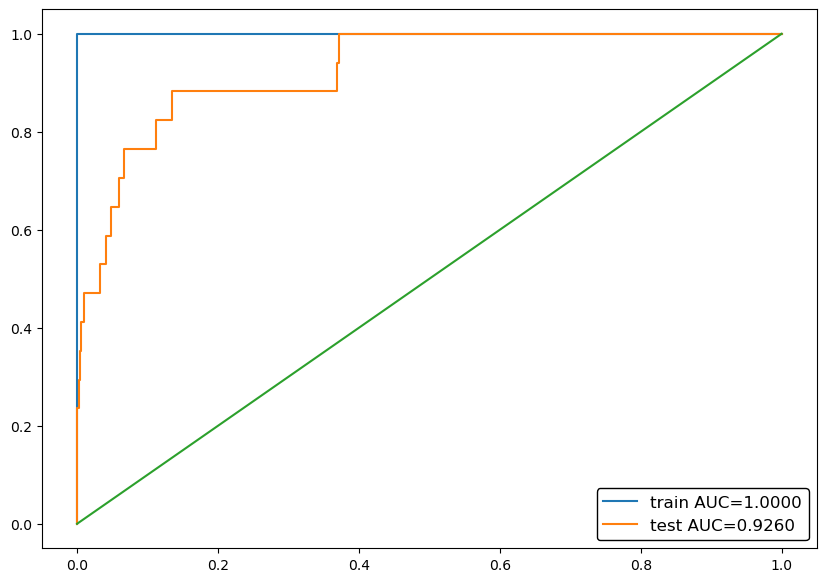

In [280]:
train_auc = roc_auc_score(y_train, y_train_predicted)
test_auc = roc_auc_score(y_test, y_test_predicted)

plt.figure(figsize=(10,7))
plt.plot(*roc_curve(y_train, y_train_predicted)[:2], label='train AUC={:.4f}'.format(train_auc))
plt.plot(*roc_curve(y_test, y_test_predicted)[:2], label='test AUC={:.4f}'.format(test_auc))
legend_box = plt.legend(fontsize='large', framealpha=1).get_frame()
legend_box.set_facecolor("white")
legend_box.set_edgecolor("black")
plt.plot(np.linspace(0,1,100), np.linspace(0,1,100))
plt.show()

In [281]:
y_test_predict = boosting_model.predict(X_test)
y_train_predict = boosting_model.predict(X_train)


In [282]:
print('train')
print ( 'Accuracy:', accuracy_score(y_train, y_train_predict))
print ('F1 score:', f1_score(y_train, y_train_predict))
print ('Recall:', recall_score(y_train, y_train_predict))
print ('Precision:', precision_score(y_train, y_train_predict))
print('test')
print ( 'Accuracy:', accuracy_score(y_test, y_test_predict))
print ('F1 score:', f1_score(y_test, y_test_predict))
print ('Recall:', recall_score(y_test, y_test_predict))
print ('Precision:', precision_score(y_test, y_test_predict))

train
Accuracy: 0.99825
F1 score: 0.9195402298850575
Recall: 0.851063829787234
Precision: 1.0
test
Accuracy: 0.986
F1 score: 0.3
Recall: 0.17647058823529413
Precision: 1.0
